# gRPC interceptor benchmarking results analysis

In [27]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load & clean the data

Path to two datasets: optimal and suboptimal

In [28]:
optimal_path = '../results_optimal.csv'
suboptimal_path = '../results_suboptimal.csv'

In [36]:
data = pd.read_csv(optimal_path)
# Function to convert latency values to milliseconds
def convert_latency_to_ms(latency_str):
    if 'ms' in latency_str:
        return float(latency_str.replace('ms', '').strip())
    elif 'µs' in latency_str:
        return float(latency_str.replace('µs', '').strip()) / 1000
    else:
        return 0

# Apply the function to Min and Max Latency columns
data['Average Latency'] = data['Average Latency'].apply(convert_latency_to_ms)
data['Max Latency'] = data['Max Latency'].apply(convert_latency_to_ms)
data['Min Latency'] = data['Min Latency'].apply(convert_latency_to_ms)


data.head(10)

,Timestamp,Total Requests,Concurrent Requests,Average Latency,Max Latency,Min Latency,Avg. Throughput req/s,Time Elapsed
0,2024-01-08 14:37:44.339547505 +0000 UTC m=+0.0...,0,0,0.000000,0.000000,0.000000,0.000000,0
1,2024-01-08 14:37:44.501724214 +0000 UTC m=+0.1...,1000,1,0.158262,3.683250,0.058834,6318.625046,160.517167ms
2,2024-01-08 14:37:44.591764422 +0000 UTC m=+0.2...,1000,2,0.176525,0.513542,0.089334,5664.896621,89.402583ms
3,2024-01-08 14:37:44.657560922 +0000 UTC m=+0.3...,1000,3,0.192097,0.452334,0.088125,5205.691228,65.086791ms
4,2024-01-08 14:37:44.711792422 +0000 UTC m=+0.3...,1000,4,0.210213,0.663958,0.085500,4757.067368,53.551042ms
5,2024-01-08 14:37:44.758114547 +0000 UTC m=+0.4...,1000,5,0.223916,0.751833,0.100292,4465.941382,45.608625ms
6,2024-01-08 14:37:44.799452881 +0000 UTC m=+0.4...,1000,6,0.237729,0.672875,0.101958,4206.460112,40.448542ms
7,2024-01-08 14:37:44.869625422 +0000 UTC m=+0.5...,1000,7,0.479018,7.894500,0.102083,2087.600480,69.439542ms
8,2024-01-08 14:37:44.905832839 +0000 UTC m=+0.5...,1000,8,0.278353,0.894375,0.099208,3592.550820,35.421792ms
9,2024-01-08 14:37:44.938821797 +0000 UTC m=+0.6...,1000,9,0.280742,0.819333,0.115084,3561.983869,32.317ms


In [30]:
data_suboptimal = pd.read_csv(suboptimal_path)
# Function to convert latency values to milliseconds
def convert_latency_to_ms(latency_str):
    if 'ms' in latency_str:
        return float(latency_str.replace('ms', '').strip())
    elif 'µs' in latency_str:
        return float(latency_str.replace('µs', '').strip()) / 1000
    else:
        return 0

# Apply the function to Min and Max Latency columns
data_suboptimal['Average Latency'] = data_suboptimal['Average Latency'].apply(convert_latency_to_ms)
data_suboptimal['Max Latency'] = data_suboptimal['Max Latency'].apply(convert_latency_to_ms)
data_suboptimal['Min Latency'] = data_suboptimal['Min Latency'].apply(convert_latency_to_ms)


data.head(10)

,Timestamp,Total Requests,Concurrent Requests,Average Latency,Max Latency,Min Latency,Avg. Throughput req/s,Time Elapsed,Average Latency (ms),Max Latency (ms),Min Latency (ms)
0,2024-01-08 14:37:44.339547505 +0000 UTC m=+0.0...,0,0,0,0,0,0.000000,0,0.000000,0.000000,0.000000
1,2024-01-08 14:37:44.501724214 +0000 UTC m=+0.1...,1000,1,158.262µs,3.68325ms,58.834µs,6318.625046,160.517167ms,0.158262,3.683250,0.058834
2,2024-01-08 14:37:44.591764422 +0000 UTC m=+0.2...,1000,2,176.525µs,513.542µs,89.334µs,5664.896621,89.402583ms,0.176525,0.513542,0.089334
3,2024-01-08 14:37:44.657560922 +0000 UTC m=+0.3...,1000,3,192.097µs,452.334µs,88.125µs,5205.691228,65.086791ms,0.192097,0.452334,0.088125
4,2024-01-08 14:37:44.711792422 +0000 UTC m=+0.3...,1000,4,210.213µs,663.958µs,85.5µs,4757.067368,53.551042ms,0.210213,0.663958,0.085500
5,2024-01-08 14:37:44.758114547 +0000 UTC m=+0.4...,1000,5,223.916µs,751.833µs,100.292µs,4465.941382,45.608625ms,0.223916,0.751833,0.100292
6,2024-01-08 14:37:44.799452881 +0000 UTC m=+0.4...,1000,6,237.729µs,672.875µs,101.958µs,4206.460112,40.448542ms,0.237729,0.672875,0.101958
7,2024-01-08 14:37:44.869625422 +0000 UTC m=+0.5...,1000,7,479.018µs,7.8945ms,102.083µs,2087.600480,69.439542ms,0.479018,7.894500,0.102083
8,2024-01-08 14:37:44.905832839 +0000 UTC m=+0.5...,1000,8,278.353µs,894.375µs,99.208µs,3592.550820,35.421792ms,0.278353,0.894375,0.099208
9,2024-01-08 14:37:44.938821797 +0000 UTC m=+0.6...,1000,9,280.742µs,819.333µs,115.084µs,3561.983869,32.317ms,0.280742,0.819333,0.115084


## Plotting
### Optimal Conditions (all incersceptors disabled)

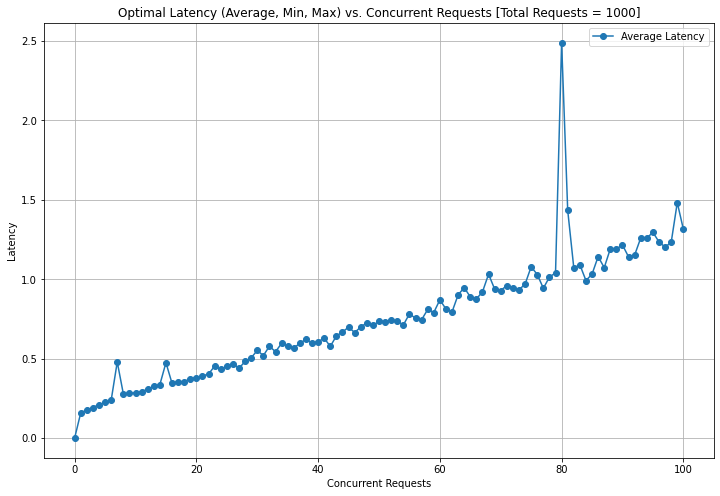

In [47]:
# Plotting Average, Min, and Max Latency
plt.figure(figsize=(12, 8))
plt.plot(data['Concurrent Requests'], data['Average Latency'], marker='o', label='Average Latency')
# plt.plot(data['Concurrent Requests'], data['Min Latency (ms)'], marker='x', linestyle='--', label='Min Latency')
# plt.plot(data['Concurrent Requests'], data['Max Latency (ms)'], marker='s', linestyle='-.', label='Max Latency')

plt.title('Optimal Latency (Average, Min, Max) vs. Concurrent Requests [Total Requests = ' + str(data["Total Requests"][1]) + ']')
plt.xlabel('Concurrent Requests')
plt.ylabel('Latency')
plt.legend()
plt.grid(True)
plt.show()




### Suboptimal results (all interceptors disabled)

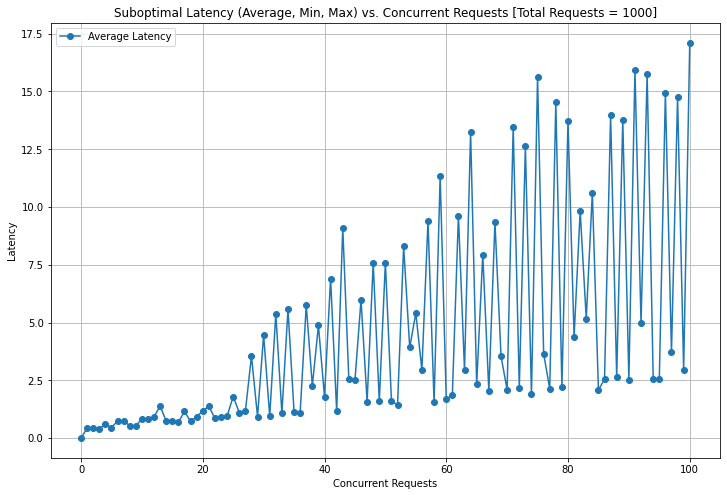

In [49]:
# Plotting Average, Min, and Max Latency
plt.figure(figsize=(12, 8))
plt.plot(data_suboptimal['Concurrent Requests'], data_suboptimal['Average Latency'], marker='o', label='Average Latency')
# plt.plot(data_suboptimal['Concurrent Requests'], data_suboptimal['Min Latency'], marker='x', linestyle='--', label='Min Latency')
# plt.plot(data_suboptimal['Concurrent Requests'], data_suboptimal['Max Latency'], marker='s', linestyle='-.', label='Max Latency')

plt.title('Suboptimal Latency (Average, Min, Max) vs. Concurrent Requests [Total Requests = ' + str(data_suboptimal["Total Requests"][1]) + ']')
plt.xlabel('Concurrent Requests')
plt.ylabel('Latency')
plt.legend()
plt.grid(True)
plt.show()


## Combine optimal and suboptimal in one plot
### Average Latency

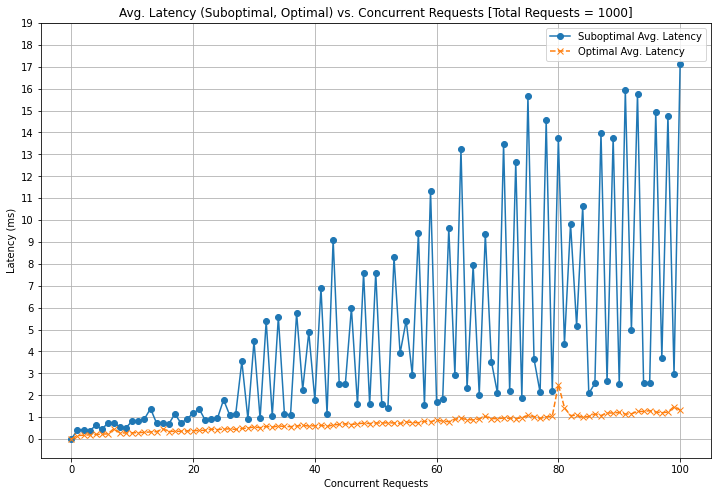

In [50]:
# Plotting Optimal and Suboptimal Average Latency
plt.figure(figsize=(12, 8))
plt.plot(data_suboptimal['Concurrent Requests'], data_suboptimal['Average Latency'], marker='o', label='Suboptimal Avg. Latency')
plt.plot(data['Concurrent Requests'], data['Average Latency'], marker='x', linestyle='--', label='Optimal Avg. Latency')

plt.title('Avg. Latency (Suboptimal, Optimal) vs. Concurrent Requests [Total Requests = ' + str(data["Total Requests"][1]) + ']')
plt.xlabel('Concurrent Requests')
plt.ylabel('Latency (ms)')
plt.yticks(np.arange(0, 20, 1))
plt.legend()
plt.grid(True)
plt.show()

### Minimum Latency

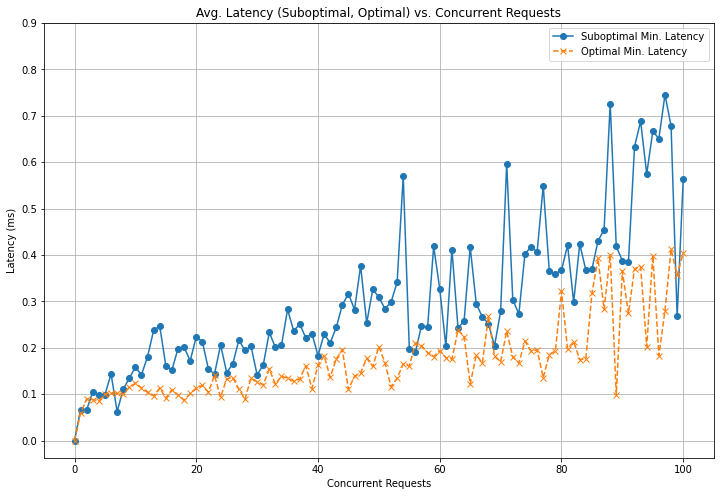

In [44]:
# Plotting Optimal and Suboptimal Minimum Latency
plt.figure(figsize=(12, 8))
plt.plot(data_suboptimal['Concurrent Requests'], data_suboptimal['Min Latency'], marker='o', label='Suboptimal Min. Latency')
plt.plot(data['Concurrent Requests'], data['Min Latency'], marker='x', linestyle='--', label='Optimal Min. Latency')

plt.title('Avg. Latency (Suboptimal, Optimal) vs. Concurrent Requests')
plt.xlabel('Concurrent Requests')
plt.ylabel('Latency (ms)')
plt.yticks(np.arange(0, 1, 0.1))
plt.legend()
plt.grid(True)
plt.show()

### Throughput

In [ ]:
# Plotting Optimal and Suboptimal Minimum Latency
plt.figure(figsize=(12, 8))
plt.plot(data_suboptimal['Concurrent Requests'], data_suboptimal['Avg. Throughput req/s'], marker='o', label='Suboptimal Throughput')
plt.plot(data['Concurrent Requests'], data['Avg. Throughput req/s'], marker='x', linestyle='--', label='Optimal Throughput')

plt.title('Avg. Throughput (Suboptimal, Optimal) vs. Concurrent Requests')
plt.xlabel('Concurrent Requests')
plt.ylabel('Throughput (req/s)')
# plt.yticks(np.arange(0, 1, 0.1))
plt.legend()
plt.grid(True)
plt.show()